In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rameezmeerasahib/electric-vehicle-ev-sales-and-adoption")

print("Path to dataset files:", path)

/opt/anaconda3/envs/kaggle/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 12.5k/12.5k [00:00<00:00, 155kB/s]

Extracting files...
Path to dataset files: /Users/jackgedge/.cache/kagglehub/datasets/rameezmeerasahib/electric-vehicle-ev-sales-and-adoption/versions/3


In [1]:
from scripts.notebook_setup import *

In [2]:
PROJECT = 'ev_sales'
training_data_path = os.path.join(INPUT_DIR, PROJECT, 'test.csv')
test_data_path = os.path.join(INPUT_DIR, PROJECT, 'train.csv')

In [ ]:
# Read files in path
csv_files = [str(file) for file in Path(path).rglob('*.csv')]
train_df = pd.read_csv(csv_files[0])

NameError: name 'path' is not defined

In [ ]:
train_df.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


In [ ]:
train_df.shape

(275, 9)

In [ ]:
train_df.isna().sum()

Date                    0
Region                  0
Brand                   0
Model                   0
Vehicle_Type            0
Battery_Capacity_kWh    0
Discount_Percentage     0
Customer_Segment        0
Fast_Charging_Option    0
dtype: int64

In [ ]:
train_df.duplicated().sum()

np.int64(0)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  275 non-null    object
 1   Region                275 non-null    object
 2   Brand                 275 non-null    object
 3   Model                 275 non-null    object
 4   Vehicle_Type          275 non-null    object
 5   Battery_Capacity_kWh  275 non-null    int64 
 6   Discount_Percentage   275 non-null    int64 
 7   Customer_Segment      275 non-null    object
 8   Fast_Charging_Option  275 non-null    object
dtypes: int64(2), object(7)
memory usage: 19.5+ KB


In [ ]:
# Cast date to datetime object
train_df['Date'] = train_df['Date'].apply(pd.to_datetime)
date_range = f"{train_df['Date'].min().strftime('%B %d, %Y')} to {train_df['Date'].max().strftime('%B %d, %Y')}"

In [ ]:
train_df['Date'].max()

Timestamp('2023-12-01 00:00:00')

In [ ]:
train_df['Region'].unique()

array(['Oceania', 'South America', 'Africa', 'North America', 'Asia',
       'Europe'], dtype=object)

[Text(0.5, 1.0, 'EV Sales by Region for Period January 01, 2023 to December 01, 2023'),
 Text(0, 0.5, 'Count')]

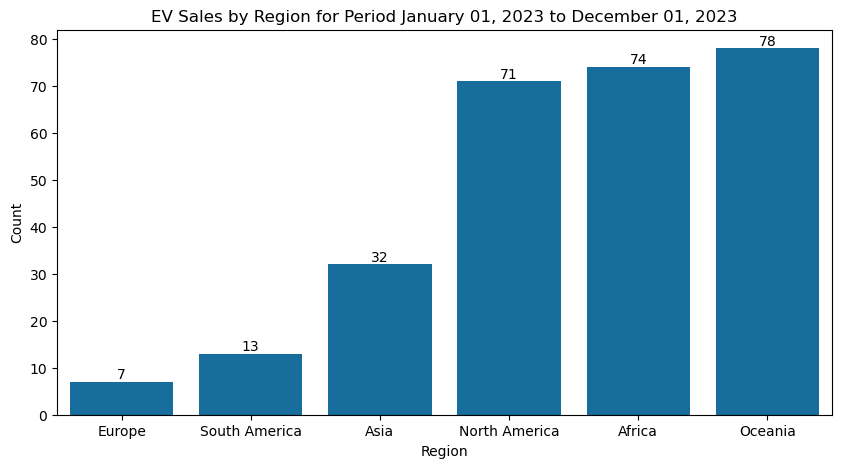

In [ ]:
plt.figure()
order = train_df['Region'].value_counts(ascending=True).index
ax=sns.countplot(data=train_df, x='Region', order=order)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
ax.set(title=f"EV Sales by Region for Period {date_range}",
       ylabel='Count')

[Text(0.5, 1.0, 'EV Brand Sales per Region for Period January 01, 2023 to December 01, 2023')]

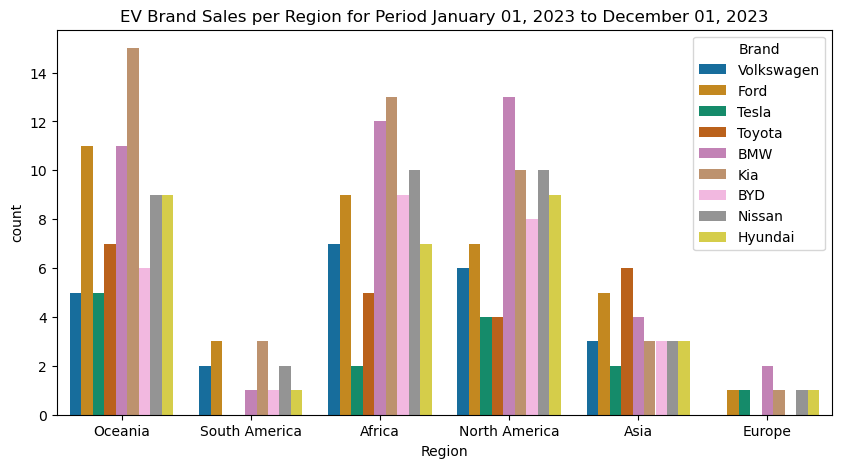

In [ ]:
plt.figure()
ax=sns.countplot(data=train_df, x='Region', hue='Brand')
ax.set(title=f"EV Brand Sales per Region for Period {date_range}")

In [ ]:
train_df['Brand'].unique()

array(['Volkswagen', 'Ford', 'Tesla', 'Toyota', 'BMW', 'Kia', 'BYD',
       'Nissan', 'Hyundai'], dtype=object)

[Text(0.5, 1.0, 'Total Brand EV Sales for Period January 01, 2023 to December 01, 2023'),
 Text(0, 0.5, 'Count')]

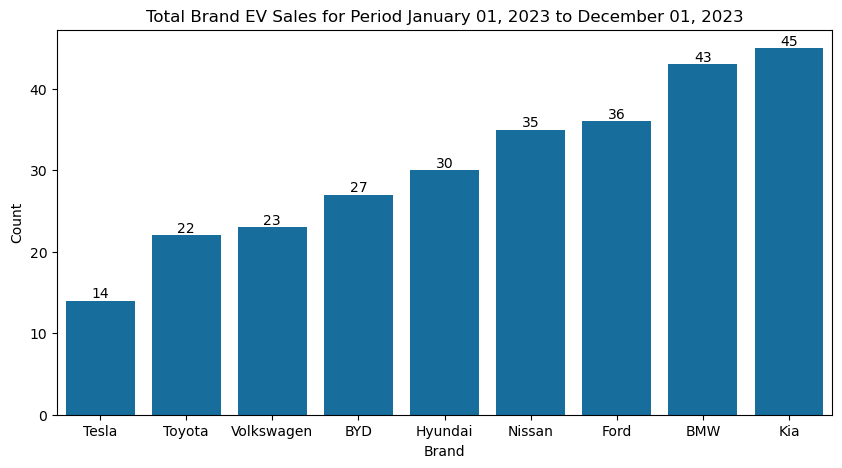

In [ ]:
plt.figure(figsize=(10,5))
# Sort the brands by count ascending
order = train_df['Brand'].value_counts(ascending=True).index
ax=sns.countplot(data=train_df, x='Brand', order=order)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                va='bottom', ha='center')
ax.set(title=f"Total Brand EV Sales for Period {date_range}",
       ylabel='Count')

In [ ]:
train_df.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04-01,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10-01,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10-01,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02-01,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10-01,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


[Text(0.5, 1.0, 'Most Popular Vehicle Types for Period January 01, 2023 to December 01, 2023')]

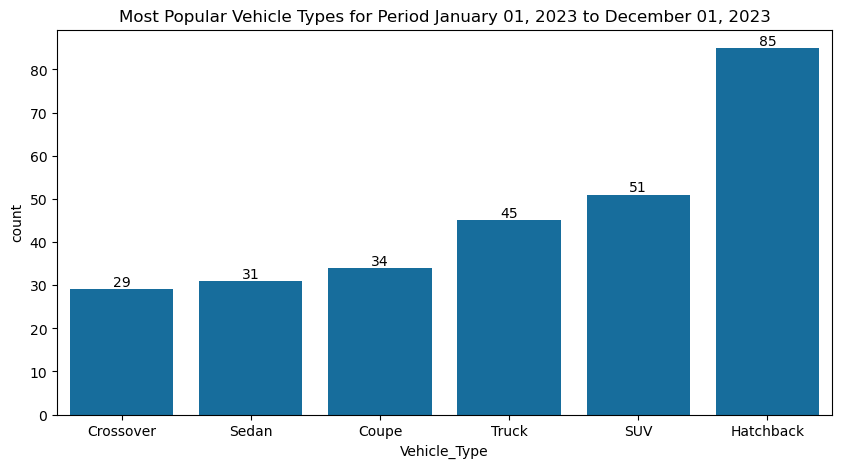

In [ ]:
plt.figure()
order=train_df['Vehicle_Type'].value_counts(ascending=True).index
ax=sns.countplot(data=train_df, x='Vehicle_Type', order=order)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
ax.set(title=f"Most Popular Vehicle Types for Period {date_range}")

[Text(0.5, 1.0, 'Most Popular Brand per Vehicle Type for Period January 01, 2023 to December 01, 2023'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Vehicle Type')]

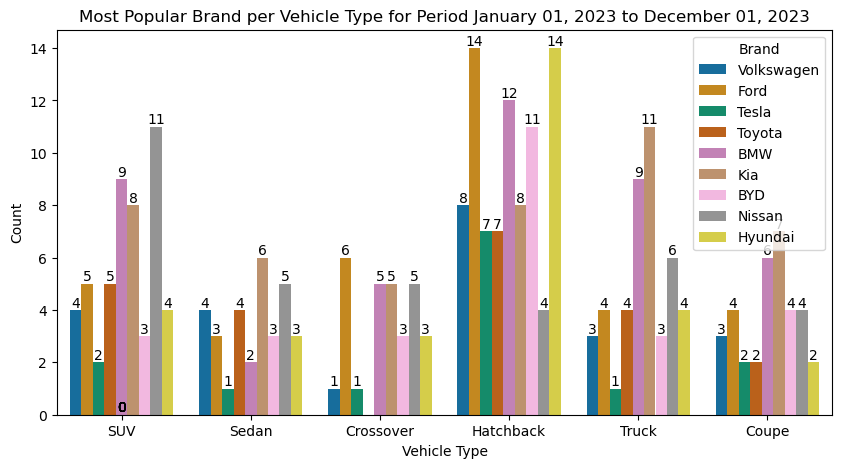

In [ ]:
plt.figure()
order=train_df['Vehicle_Type'].value_counts(ascending=True).index
ax=sns.countplot(data=train_df, x='Vehicle_Type', hue='Brand')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
ax.set(title=f"Most Popular Brand per Vehicle Type for Period {date_range}",
       ylabel='Count',
       xlabel='Vehicle Type')

In [ ]:
train_df.columns

Index(['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option'],
      dtype='object')

In [ ]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month

In [ ]:
grouped_train_df = train_df.groupby([
    'Year', 'Month', 'Region', 'Brand'
]).size().reset_index(name='Units_Sold')

grouped_train_df.head()

,Year,Month,Region,Brand,Units_Sold
0,2023,1,Africa,BMW,1
1,2023,1,Africa,Ford,1
2,2023,1,Africa,Kia,1
3,2023,1,Africa,Tesla,1
4,2023,1,Africa,Toyota,2


In [ ]:
X = grouped_train_df.drop(columns='Units_Sold')
y = grouped_train_df['Units_Sold']
X = pd.get_dummies(X, drop_first=True)

# Train/test split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

max_leaf_nodes = [5, 50, 500, 5000]

for max_nodes in max_leaf_nodes:
    model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=max_nodes)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    print(f"max_leaf_nodes: {max_nodes} -> RMSE: {rmse:.2f}")

max_leaf_nodes: 5 -> RMSE: 0.66
max_leaf_nodes: 50 -> RMSE: 0.76
max_leaf_nodes: 500 -> RMSE: 0.84
max_leaf_nodes: 5000 -> RMSE: 0.84


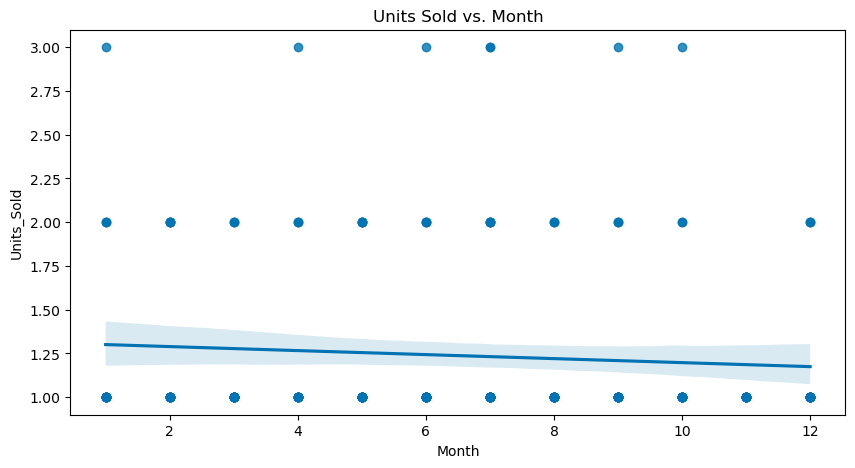

In [ ]:
plt.figure()
ax = sns.regplot(data=grouped_train_df, x='Month', y='Units_Sold')

plt.title("Units Sold vs. Month")
plt.show()

In [ ]:
train_df.columns

Index(['Date', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option', 'Year', 'Month'],
      dtype='object')

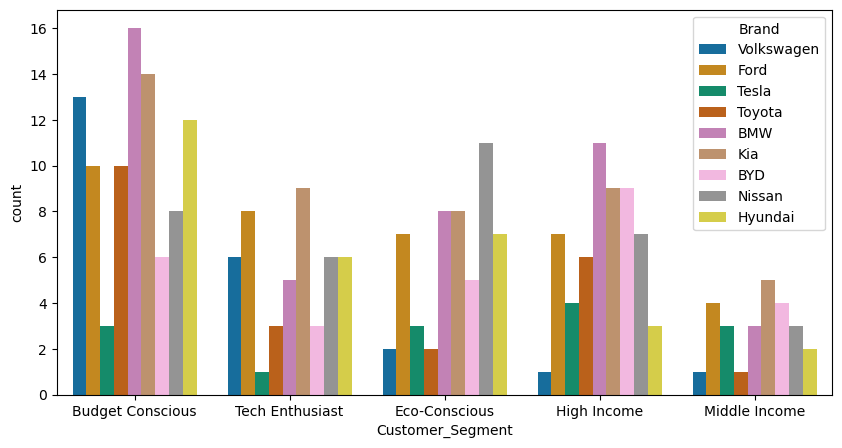

In [ ]:
plt.figure()
ax=sns.countplot(data=train_df, x='Customer_Segment', hue='Brand')

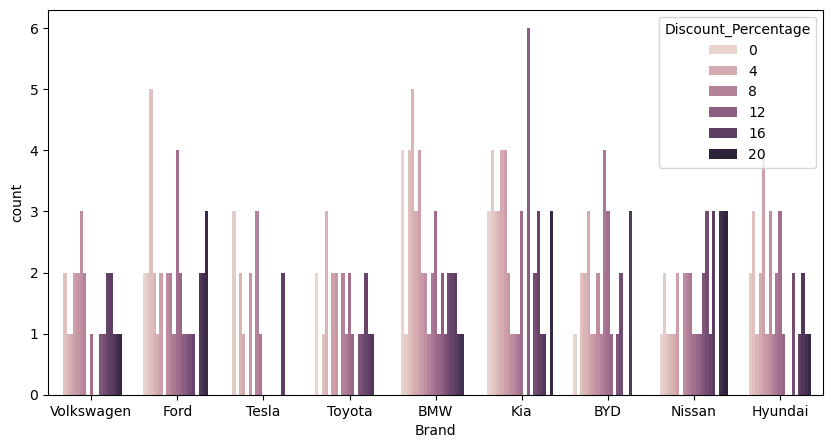

In [ ]:
plt.figure()
ax=sns.countplot(data=train_df, x='Brand', hue='Discount_Percentage')